# Guided Example

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

%matplotlib inline

What we want to see is if we can use the ingredient and keyword list to predict the rating. For someone writing a cookbook this could be really useful information that could help them choose which recipes to include because they're more likely to be enjoyed and therefore make the book more likely to be successful.

First let's load the dataset. It's [available on Kaggle](https://www.kaggle.com/hugodarwood/epirecipes). We'll use the csv file here and as pull out column names and some summary statistics for ratings.

In [2]:
raw_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/epi_r.csv')

In [3]:
list(raw_data.columns)

['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisk

In [4]:
raw_data.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

We learn a few things from this analysis. From a ratings perspective, there are just over 20,000 recipes with an average rating of 3.71. What is interesting is that the 25th percentile is actually above the mean. This means there is likely some kind of outlier population. This makes sense when we think about reviews: some bad recipes may have very few very low reviews.

Let's validate the idea a bit further with a histogram.

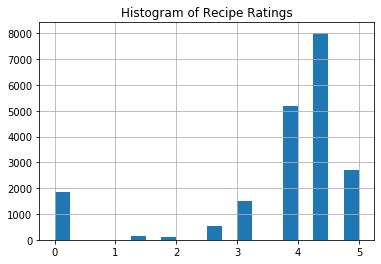

In [5]:
raw_data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

So a few things are shown in this histogram. Firstly there are sharp discontinutities. We don't have continuous data. No recipe has a 3.5 rating, for example. Also we see the anticipated increase at 0.

Let's try a naive approach again, this time using SVM Regressor. But first, we'll have to do a bit of data cleaning.

In [6]:
# Count nulls
null_count = raw_data.isnull().sum()
null_count[null_count > 0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

What we can see right away is that nutrition information is not available for all goods. Now this would be an interesting data point, but let's focus on ingredients and keywords right now. So we'll actually drop the whole columns for calories, protein, fat, and sodium. We'll come back to nutrition information later.

In [7]:
# SVM Regressor
svr = SVR()

X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1).sample(frac=0.3, replace=True, random_state=1)
Y = raw_data['rating'].sample(frac=0.3, replace=True, random_state=1)

svr.fit(X, Y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

__Note that this actually takes quite a while to run, compared to some of the models we've done before. Be patient.__ It's because of the number of features we have.

Let's see what a scatter plot looks like, comparing actuals to predicted.

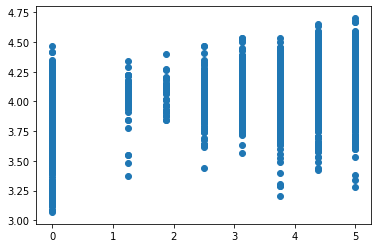

In [8]:
plt.scatter(Y, svr.predict(X))
plt.show()

Now that is a pretty useless visualization. This is because of the discontinuous nature of our outcome variable. There's too much data for us to really see what's going on here. If you wanted to look at it you could create histograms, here we'll move on to the scores of both our full fit model and with cross validation. Again if you choose to run it again it will take some time, so you probably shouldn't.

In [9]:
# Score of full fit model (seems that it is actually a 30% sample of the raw data)
svr.score(X, Y)

-0.003978314483867873

In [10]:
# Score with cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(svr, X, Y, cv=5)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarni

array([-0.01787926, -0.02916288, -0.02841122, -0.03767394, -0.01735362])

Oh dear, so this did not work very well. In fact it is remarkably poor. Now there are many things that we could do here. 

Firstly the overfit is a problem, even though it was poor in the first place. We could go back and clean up our feature set. There might be some gains to be made by getting rid of the noise.

We could also see how removing the nulls but including dietary information performs. Though its a slight change to the question we could still possibly get some improvements there.

Lastly, we could take our regression problem and turn it into a classifier. With this number of features and a discontinuous outcome, we might have better luck thinking of this as a classification problem. We could make it simpler still by instead of classifying on each possible value, group reviews to some decided high and low values.

__And that is your challenge.__

Transform this regression problem into a binary classifier and clean up the feature set. You can choose whether or not to include nutritional information, but try to cut your feature set down to the 30 most valuable features.

Good luck!

When you've finished that, also take a moment to think about bias. Is there anything in this dataset that makes you think it could be biased, perhaps extremely so?

There is. Several things in fact, but most glaringly is that we don't actually have a random sample. It could be, and probably is, that the people more likely to choose some kinds of recipes are more likely to give high reviews.

After all, people who eat chocolate _might_ just be happier people.

# Challenge

## Clean Data

In [11]:
# Drop non-numerical categories ('title' only)
raw_data.drop('title', inplace=True, axis=1)
raw_data

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20047,3.125,28.0,2.0,2.0,64.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20048,4.375,671.0,22.0,28.0,583.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20049,4.375,563.0,31.0,38.0,652.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20050,4.375,631.0,45.0,24.0,517.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# Drop missing values
raw_data.dropna(inplace=True, axis=0)
raw_data

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.375,948.0,19.0,79.0,1042.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20047,3.125,28.0,2.0,2.0,64.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20048,4.375,671.0,22.0,28.0,583.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20049,4.375,563.0,31.0,38.0,652.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20050,4.375,631.0,45.0,24.0,517.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
raw_data.isnull().sum()

rating        0
calories      0
protein       0
fat           0
sodium        0
             ..
cookbooks     0
leftovers     0
snack         0
snack week    0
turkey        0
Length: 679, dtype: int64

In [14]:
# Select 30 variables most highly correlated with rating
corr_matrix = raw_data.corr()['rating'].sort_values(ascending=False).index.to_list()
feature_list = corr_matrix[1:31]
feature_list

['bon appétit',
 'peanut free',
 'soy free',
 'roast',
 'bake',
 'tree nut free',
 'fall',
 'sauté',
 'thanksgiving',
 'winter',
 'grill/barbecue',
 'dinner',
 'cheese',
 'onion',
 'low carb',
 'braise',
 'beef',
 'goat cheese',
 'tomato',
 'kosher',
 'herb',
 'no sugar added',
 'christmas',
 'pork',
 'lamb',
 'broil',
 'marinate',
 'pescatarian',
 'mixer',
 'sugar conscious']

In [15]:
len(feature_list)

30

In [16]:
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

In [17]:
var_list = ['broil']

dictionary = {}

for var in var_list:
    categories = raw_data[var]
    measurements = raw_data['rating']
    dictionary[var] = correlation_ratio(categories, measurements)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:1143: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


In [18]:
dictionary

{'broil': nan}

Doesn't work if variables have any 0s, but this is how you would implement correlation_ratio. Categories refers to variables and measurements refers to target variable.

## Retry SVM Regression Model with Top 30 Features

In [19]:
# SVM Regression model
X = raw_data[feature_list].sample(frac=0.3, replace=True, random_state=1)
Y = raw_data['rating'].sample(frac=0.3, replace=True, random_state=1)

svr = SVR()

# Score with cross validation
cross_val_score(svr, X, Y, cv=5)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarni

array([-0.01493578, -0.03993856, -0.02938081, -0.0554749 , -0.05110863])

### Conclusion
No improvement.

## Convert Ratings to Binomial

In [20]:
# Create new binomial target variable
raw_data['is_good_rating'] = np.where(raw_data['rating'] >= 4, 1, 0)
raw_data[['rating', 'is_good_rating']]

,rating,is_good_rating
0,2.500,0
1,4.375,1
2,3.750,0
4,3.125,0
5,4.375,1
...,...,...
20047,3.125,0
20048,4.375,1
20049,4.375,1
20050,4.375,1


In [21]:
raw_data.head()

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey,is_good_rating
0,2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,4.375,948.0,19.0,79.0,1042.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [22]:
print(raw_data['is_good_rating'].sum() / len(raw_data['is_good_rating']))

0.5457639939485628


A rating cutoff of 4 resulted in decent class balance (45-55 split between 0s and 1s).

# SVM Classification Model with Top 30 Features

In [23]:
# SVM Classification model
X = raw_data[feature_list].sample(frac=0.3, replace=True, random_state=1)
Y = raw_data['is_good_rating'].sample(frac=0.3, replace=True, random_state=1)

svc = SVC()

# Score with cross validation
print(cross_val_score(svc, X, Y, cv=5),
      cross_val_score(svc, X, Y, cv=5).mean())

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarni

[0.56617647 0.57457983 0.57247899 0.56302521 0.59726604] 0.5747053079907041


### Conclusion
The SVM Classification using the top 30 most correlated features performed much better than the SVM Regression, having a mean accuracy of 57.5% with only slight overfitting.

# SVM Classification Model with All Features

In [24]:
# SVM Classification model
X = raw_data.drop(['rating', 'is_good_rating'], 1).sample(frac=0.3, replace=True, random_state=1)
Y = raw_data['is_good_rating'].sample(frac=0.3, replace=True, random_state=1)

svc = SVC()

# Score with cross validation
print(cross_val_score(svc, X, Y, cv=5),
      cross_val_score(svc, X, Y, cv=5).mean())

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarni

[0.61764706 0.60714286 0.57668067 0.60189076 0.60462671] 0.601597610653094


### Conclusion
The SVM Classification using all of the features performed a little better than the previous SVM Classification, having a mean accuracy of 60.2% with only a hint of overfitting.

# SVM Classification Model with Top 30 Components

In [25]:
# Set feature and target variables
X = raw_data.drop(['rating', 'is_good_rating'], 1).sample(frac=0.3, replace=True, random_state=1)
Y = raw_data['is_good_rating'].sample(frac=0.3, replace=True, random_state=1)

# Standardize the features
X = StandardScaler().fit_transform(X)

# Perform PCA
pca = PCA(n_components=30)
principal_components = pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    pca.explained_variance_ratio_,
    '\n\nThe cumulative percentage of total variance in the dataset explained by',
    'the components from Sklearn PCA.\n',
    pca.explained_variance_ratio_.cumsum()
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.01266396 0.01078018 0.00885821 0.00695991 0.00635048 0.00569717
 0.00566094 0.0051676  0.00511303 0.00488641 0.00482998 0.00469734
 0.00457581 0.00452697 0.00436052 0.00434043 0.00427631 0.00410013
 0.00407824 0.00392474 0.0038817  0.00377894 0.00375853 0.0037101
 0.00366169 0.00363964 0.00359464 0.00351971 0.00350169 0.00343334] 

The cumulative percentage of total variance in the dataset explained by the components from Sklearn PCA.
 [0.01266396 0.02344413 0.03230234 0.03926226 0.04561274 0.05130991
 0.05697085 0.06213845 0.06725148 0.07213789 0.07696787 0.08166521
 0.08624102 0.09076799 0.09512851 0.09946894 0.10374525 0.10784538
 0.11192362 0.11584836 0.11973006 0.12350901 0.12726754 0.13097763
 0.13463932 0.13827896 0.1418736  0.14539332 0.148895   0.15232834]


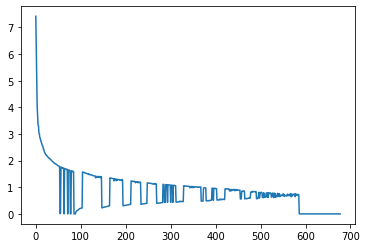

[ 7.42263777e+00  6.31851280e+00  5.19200412e+00  4.07939212e+00
  3.72225093e+00  3.33985529e+00  3.31862502e+00  3.02998289e+00
  2.99935031e+00  2.86780579e+00  2.83371450e+00  2.75925541e+00
  2.69154964e+00  2.66194861e+00  2.57996610e+00  2.56398896e+00
  2.52222147e+00  2.42689285e+00  2.40749656e+00  2.33366439e+00
  2.29851736e+00  2.26473063e+00  2.22683284e+00  2.22200556e+00
  2.20358178e+00  2.17572834e+00  2.14916675e+00  2.13331567e+00
  2.12089378e+00  2.11291897e+00  2.07771933e+00  2.07217101e+00
  2.06122926e+00  2.05138953e+00  2.02590267e+00  1.99994565e+00
  1.98776347e+00  1.97435207e+00  1.95710962e+00  1.94699904e+00
  1.92043022e+00  1.91288761e+00  1.89387691e+00  1.88856659e+00
  1.88567221e+00  1.86375217e+00  1.85492665e+00  1.84267893e+00
  1.82696910e+00  1.80946419e+00  1.80356201e+00  1.79784131e+00
  1.79364341e+00  1.77064260e+00  9.64320151e-03  4.31507230e-02
  1.76457927e+00  1.75173201e+00  1.74153513e+00  1.73299460e+00
  1.71238385e+00  1.72028

In [26]:
# Print scree plot
Xt = X.T
Cx = np.cov(Xt)

eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

plt.plot(eig_val_cov)
plt.show()

print(eig_val_cov)

In [27]:
# Use components as features in model
principal_df = pd.DataFrame(data=principal_components)

# Initialize model
svc = SVC()

# Score with cross validation
print(cross_val_score(svc, principal_df, Y, cv=5),
      cross_val_score(svc, principal_df, Y, cv=5).mean())

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarni

[0.63445378 0.62079832 0.6302521  0.61134454 0.66246057] 0.6318618614638284


### Conclusion
The SVM Classification using the top 30 components performed a little better than the previous SVM Classification models, having a mean accuracy of 63.5% with only a slight hint of overfitting.

# Find variables positively correlated with is_good_rating

In [31]:
# Create dataframe with correlation between 'is_good_rating' and all other variables
corr_df = pd.DataFrame(raw_data.drop(['rating'], 1).corr()['is_good_rating'])
corr_df

,is_good_rating
calories,0.012569
protein,0.015482
fat,0.012017
sodium,0.012684
#cakeweek,-0.008299
...,...
leftovers,-0.019463
snack,-0.015533
snack week,-0.004844
turkey,0.039578


In [32]:
# Select variables with positive correlations
pos_var_list = corr_df[(corr_df > 0).any(1)].index.to_list()

In [33]:
pos_var_list

['calories',
 'protein',
 'fat',
 'sodium',
 '#wasteless',
 '22-minute meals',
 '30 days of groceries',
 'alabama',
 'almond',
 'amaretto',
 'anchovy',
 'anniversary',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'arugula',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beet',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'blackberry',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brine',
 'brisket',
 'broccoli rabe',
 'broil',
 'brunch',
 'brussel sprout',
 'buffet',
 'bulgaria',
 'burrito',
 'butternut squash',
 'cake',
 'california',
 'calvados',
 'cambridge',
 'canada',
 'candy thermometer',
 'capers',
 'champagne',
 'chard',
 'cheese',
 'cherry',
 'chile pepper',
 'chili',
 'chill',
 'chocolate',
 'christmas',
 'ch

In [34]:
len(pos_var_list)

367